## Data Exploration 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df_bom_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')
df_bom_gross.sort_values('domestic_gross', ascending = False)

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015
3080,Black Panther,BV,700100000.0,646900000,2018
3079,Avengers: Infinity War,BV,678800000.0,"1,369.5",2018
1873,Jurassic World,Uni.,652300000.0,"1,019.4",2015
727,Marvel's The Avengers,BV,623400000.0,895500000,2012
...,...,...,...,...,...
1975,Surprise - Journey To The West,AR,NaN,49600000,2015
2392,Finding Mr. Right 2,CL,NaN,114700000,2016
2468,Solace,LGP,NaN,22400000,2016
2595,Viral,W/Dim.,NaN,552000,2016


Looking at the movie budgets data, I want to see if i can get a sense of movies with highest return on investment. I need to convert the budget columns into integers and then add a column calculating return on investment. I am using domestic numbers only, assuming Microsoft will want to start their venture in the US before going global. Similar to the IMDB data I am cleaning out older movies, and adding year and month columns so I can further analyze the data

In [2]:
df_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')
df_budgets['release_date'] = pd.to_datetime(df_budgets['release_date'])
df_budgets['release_year'] = df_budgets['release_date'].dt.year
df_budgets['release_month'] = df_budgets['release_date'].dt.month
df_budgets = df_budgets[(df_budgets['release_year'] >= 2014)]

In [3]:
df_budgets['production_budget'] = df_budgets['production_budget'].map(lambda price: int(price.replace("$", "").replace(",", "")))
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].map(lambda price: int(price.replace("$", "").replace(",", "")))
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].map(lambda price: int(price.replace("$", "").replace(",", "")))
df_budgets['domestic_roi'] = df_budgets['domestic_gross'] / df_budgets['production_budget']

In [4]:
df_budgets.sort_values(['domestic_roi'], ascending = False).head(20)
df_roi = df_budgets.groupby(['release_year'])['domestic_roi'].mean()
df_roi = df_roi.reset_index()

In [5]:
df_roi_mo = df_budgets.groupby(['release_month'])['domestic_roi'].mean()
df_roi_mo = df_roi_mo.reset_index()
df_roi_mo

,release_month,domestic_roi
0,1,1.620346
1,2,1.628038
2,3,1.932508
3,4,1.876318
4,5,1.389633
5,6,1.424333
6,7,4.815236
7,8,1.648232
8,9,1.030946
9,10,1.628045


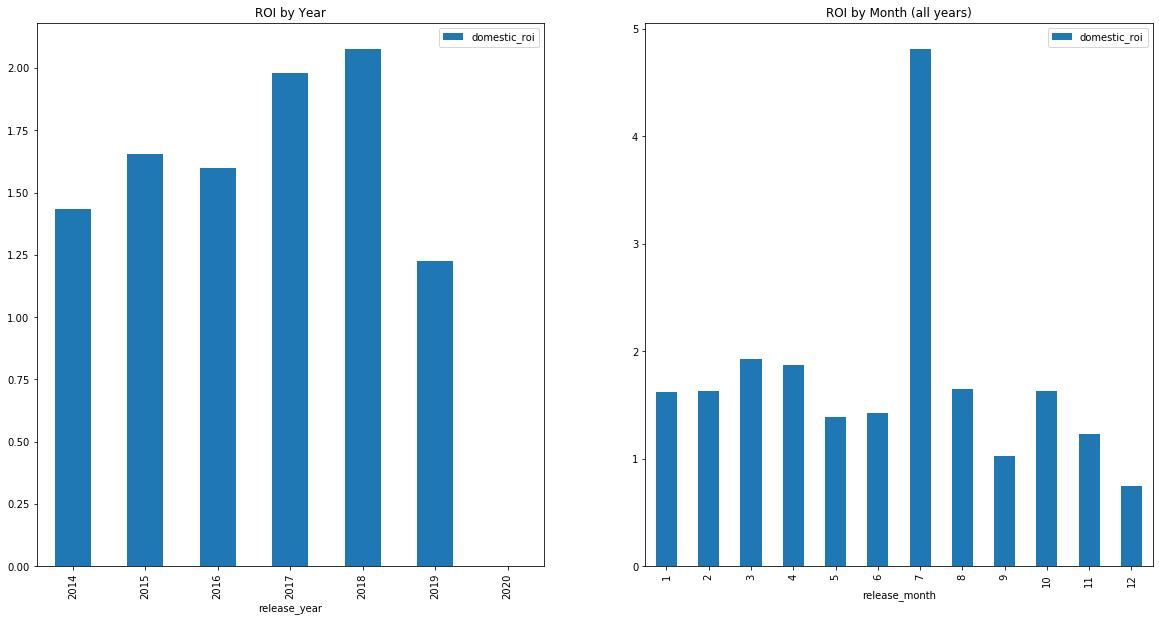

In [6]:
plt.figure(figsize=(20, 10))
ax1 = plt.subplot(1, 2, 1)
x = df_roi['release_year']
y = df_roi['domestic_roi']

df_roi.plot(x='release_year', y='domestic_roi', ax=ax1, kind = 'bar')

ax2 = plt.subplot(1,2,2)
df_roi_mo.plot(x='release_month', y='domestic_roi', ax=ax2, kind = 'bar')
ax1.set_title('ROI by Year')
ax2.set_title('ROI by Month (all years)')

plt.show()

So let's aim for our movie to come out in July! What are some big releases from Julys past?

In [16]:
df_july_movies = df_budgets[df_budgets['release_month'] == 7].sort_values(['domestic_roi'], ascending = False)
df_july_movies = df_july_movies.drop([5679])

In [19]:
df_july_movies.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,domestic_roi
5685,86,2017-07-07,A Ghost Story,100000,1594798,2769782,2017,7,15.947980
4254,55,2016-07-22,Lights Out,5000000,67268835,148806510,2016,7,13.453767
5228,29,2018-07-20,Unfriended: Dark Web,1000000,8866745,16434588,2018,7,8.866745
3770,71,2014-07-18,The Purge: Anarchy,9000000,71562550,111534881,2014,7,7.951394
3541,42,2016-07-01,The Purge: Election Year,10000000,79042440,118514727,2016,7,7.904244


'The Gallows' appears to be quite an outlier during plotting so I removed it

In [18]:
import plotly.express as px
df = df_july_movies
fig = px.scatter(df, x='production_budget', y='domestic_roi', hover_data=['movie'])
fig.show()

So if we are looking to make money off the movie as a success metric, aim for a production budget below ~80MM. These titles are diverse and contain horror, action, comedy and drama which gives us lots of options! 

In [21]:
df_july_movies[df_july_movies['production_budget'] < 80000000].head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,domestic_roi
5685,86,2017-07-07,A Ghost Story,100000,1594798,2769782,2017,7,15.947980
4254,55,2016-07-22,Lights Out,5000000,67268835,148806510,2016,7,13.453767
5228,29,2018-07-20,Unfriended: Dark Web,1000000,8866745,16434588,2018,7,8.866745
3770,71,2014-07-18,The Purge: Anarchy,9000000,71562550,111534881,2014,7,7.951394
3541,42,2016-07-01,The Purge: Election Year,10000000,79042440,118514727,2016,7,7.904244
4894,95,2018-07-13,Eighth Grade,2000000,13539710,14341016,2018,7,6.769855
4484,85,2014-07-11,Boyhood,4000000,25379975,57273049,2014,7,6.344994
2498,99,2016-07-29,Bad Moms,20000000,113257297,180998716,2016,7,5.662865
4653,54,2018-07-06,Sorry to Bother You,3200000,17493096,18285560,2018,7,5.466592
3248,49,2018-07-04,The First Purge,13000000,69488745,136617305,2018,7,5.345288


Just to backtrack and take a look at what movies had the overall biggest domestic gross, these movies all are all pretty big franchises. Unless we want to purchase or start a major movie franchise on our first try, let's use the movies above as our goal

In [24]:
df_budgets.sort_values(['domestic_gross'], ascending = False).head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month,domestic_roi
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,12,3.060988
41,42,2018-02-16,Black Panther,200000000,700059566,1348258224,2018,2,3.500298
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,4,2.262718
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,6,3.033817
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12,1.956408
43,44,2018-06-15,Incredibles 2,200000000,608581744,1242520711,2018,6,3.042909
44,45,2016-12-16,Rogue One: A Star Wars Story,200000000,532177324,1049102856,2016,12,2.660887
134,35,2017-03-17,Beauty and the Beast,160000000,504014165,1259199706,2017,3,3.150089
45,46,2016-06-17,Finding Dory,200000000,486295561,1021215193,2016,6,2.431478
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,1.388403
